## Mehrshad Saadatinia

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

### Gaussian filter (5, 7, 9, 15)
In this part we apply gaussian kernels of sizes 3, 5, 7, 9, 15 on the image

In [4]:
def gaussian_kernel(l, sig=1.):
    """
    creates gaussian `lxl` kernel and a std. deviation of `sig`
    """
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sig))
    kernel = np.outer(gauss, gauss)
    return kernel / np.sum(kernel)

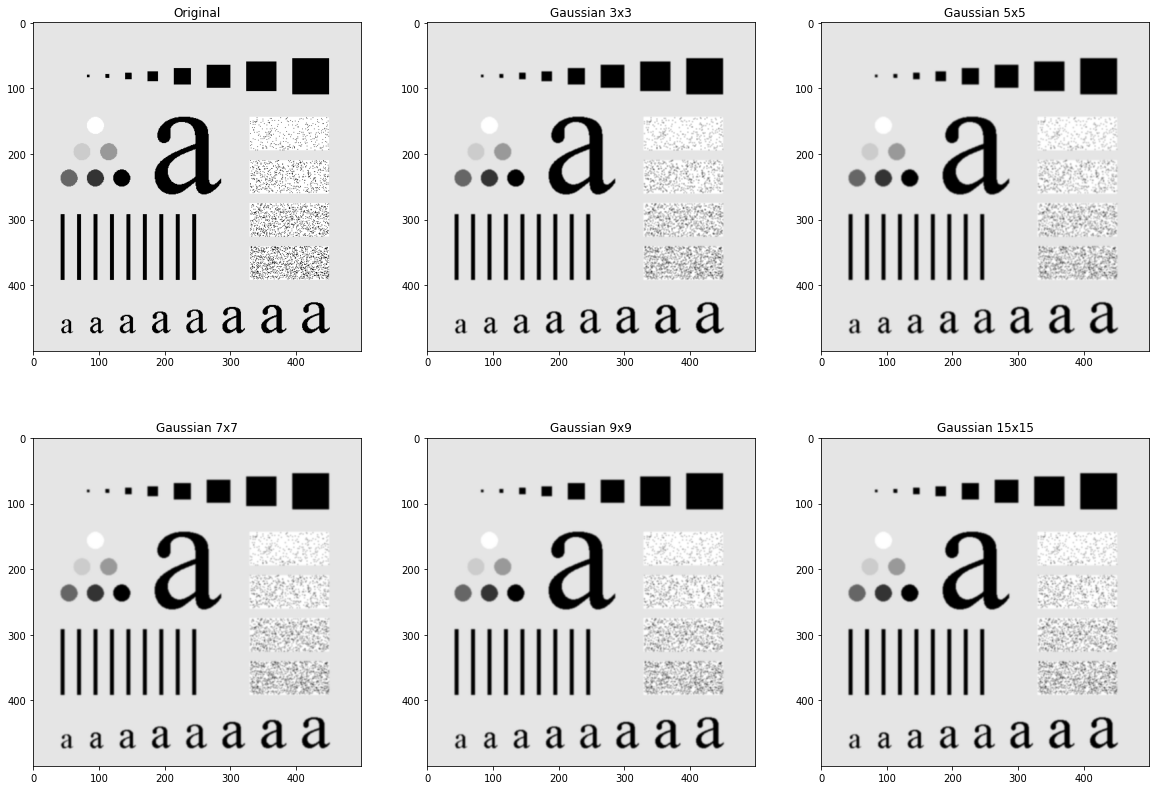

In [65]:
src_image = cv2.imread("test_pattern_blurring_orig.tif")

gauss3x3   = gaussian_kernel(l=3)
gauss5x5   = gaussian_kernel(l=5)
gauss7x7   = gaussian_kernel(l=7)
gauss9x9   = gaussian_kernel(l=9)
gauss15x15 = gaussian_kernel(l=15)

gauss_result3 = cv2.filter2D(src_image, -1, kernel3x3)
gauss_result5 = cv2.filter2D(src_image, -1, kernel5x5)
gauss_result7 = cv2.filter2D(src_image, -1, kernel7x7)
gauss_result9 = cv2.filter2D(src_image, -1, kernel9x9)
gauss_result15 = cv2.filter2D(src_image, -1, kernel15x15)

fig, axes = plt.subplots(2, 3, figsize=(20, 14))
axes[0, 0].imshow(src_image)
axes[0, 0].set_title('Original')

axes[0, 1].imshow(gauss_result3)
axes[0, 1].set_title('Gaussian 3x3')

axes[0, 2].imshow(gauss_result5)
axes[0, 2].set_title('Gaussian 5x5')

axes[1, 0].imshow(gauss_result7)
axes[1, 0].set_title('Gaussian 7x7')

axes[1, 1].imshow(gauss_result9)
axes[1, 1].set_title('Gaussian 9x9')

axes[1, 2].imshow(gauss_result15)
axes[1, 2].set_title('Gaussian 15x15')

plt.show()

### Gaussian filter (3x3 kernel,  applied 5 times on the image)

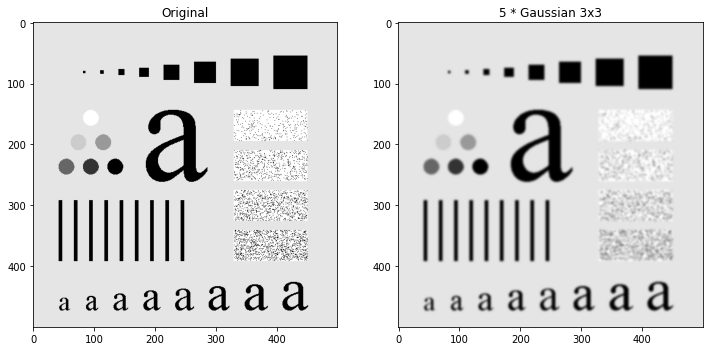

In [79]:
src_image = cv2.imread("test_pattern_blurring_orig.tif")

gauss3x3   = gaussian_kernel(l=3)

five_times = cv2.filter2D(
    cv2.filter2D(
        cv2.filter2D(
            cv2.filter2D(
                cv2.filter2D(src_image, -1, gauss3x3)
                , -1, gauss3x3)
            , -1, gauss3x3), -1, gauss3x3
    ), -1, gauss3x3
)



fig, axes = plt.subplots(1, 2, figsize=(12, 20))
axes[0].imshow(src_image)
axes[0].set_title('Original')

axes[1].imshow(five_times)
axes[1].set_title('5 * Gaussian 3x3')

plt.show()

### Averaging 'Box' Filters (3, 5, 7, 9, 15)
In this part we apply box averaging filters of sizes 3, 5, 7, 9, 15 and plot the results

In [70]:
def box_filter(l):
    return (1/(l*l)) * np.ones((l, l))

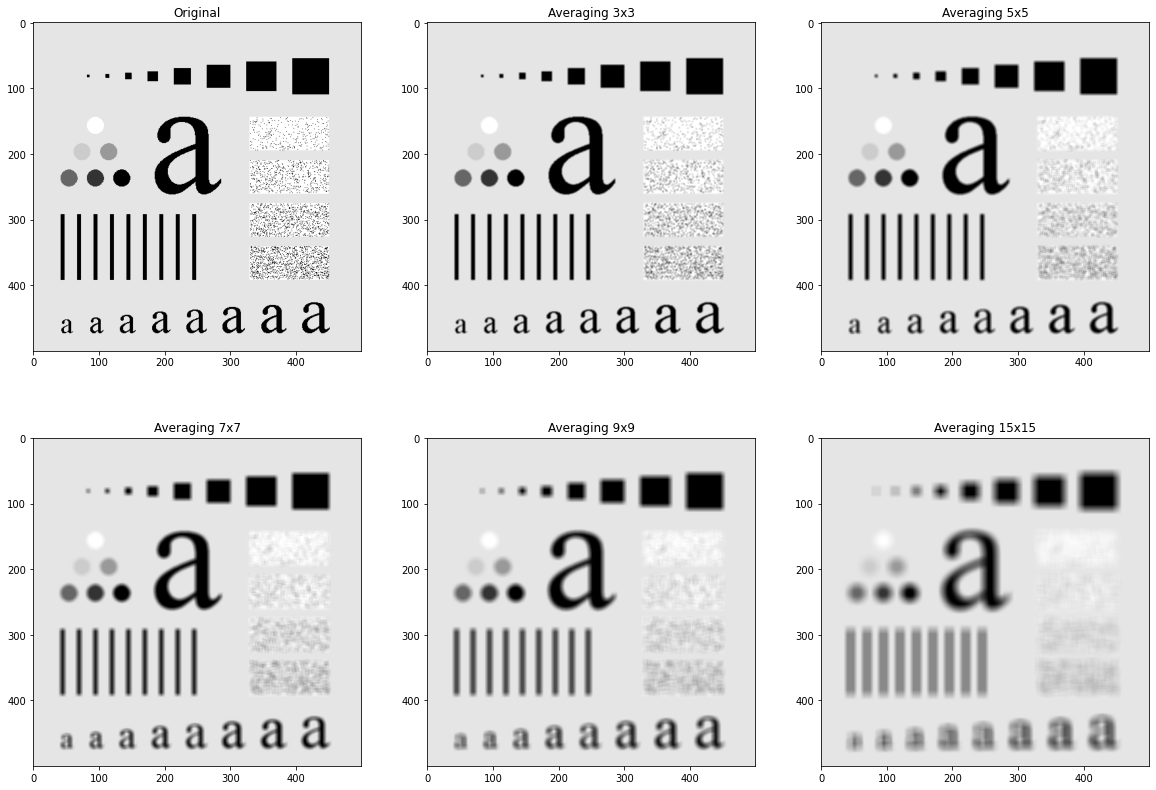

In [80]:
box3x3 = box_filter(l=3)
box5x5 = box_filter(l=5)
box7x7 = box_filter(l=7)
box9x9 = box_filter(l=9)
box15x15 = box_filter(l=15)


box_result3 = cv2.filter2D(src_image, -1, box3x3)
box_result5 = cv2.filter2D(src_image, -1, box5x5)
box_result7 = cv2.filter2D(src_image, -1, box7x7)
box_result9 = cv2.filter2D(src_image, -1, box9x9)
box_result15 = cv2.filter2D(src_image, -1, box15x15)

fig, axes = plt.subplots(2, 3, figsize=(20, 14))
axes[0, 0].imshow(src_image)
axes[0, 0].set_title('Original')

axes[0, 1].imshow(box_result3)
axes[0, 1].set_title('Averaging 3x3')

axes[0, 2].imshow(box_result5)
axes[0, 2].set_title('Averaging 5x5')

axes[1, 0].imshow(box_result7)
axes[1, 0].set_title('Averaging 7x7')

axes[1, 1].imshow(box_result9)
axes[1, 1].set_title('Averaging 9x9')

axes[1, 2].imshow(box_result15)
axes[1, 2].set_title('Averaging 15x15')

plt.show()

### Averaging filter (3x3 kernel,  applied 5 times on the image)

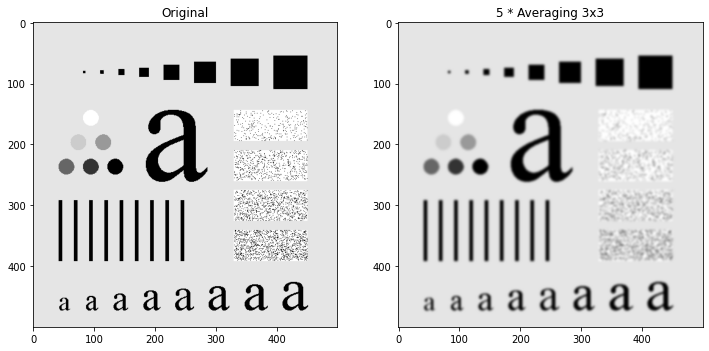

In [87]:

box3x3   = box_filter(l=3)

five_times_avg = cv2.filter2D(
    cv2.filter2D(
        cv2.filter2D(
            cv2.filter2D(
                cv2.filter2D(src_image, -1, box3x3), -1, box3x3
            ), -1, box3x3
        ), -1, box3x3
    ), -1, box3x3
)



fig, axes = plt.subplots(1, 2, figsize=(12, 20))
axes[0].imshow(src_image)
axes[0].set_title('Original')

axes[1].imshow(five_times_avg)
axes[1].set_title('5 * Averaging 3x3')

plt.show()